# Monte Carlo on Geometry variablity convergence plots, using RMSD between conformers as a metric of variability. 

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import glob
from os.path import *
import pandas as pd
import numpy as np

In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
names = ['Harmine', '1-Methylguanosine', 'Sphingosine', 'riboflavin', 'Mandelonitrile',
         'Creatinine', 'Methyleugenol', 'N6-methyladenosine', 'Cholic Acid', 'Astilbin',
         'SDGRG', 'Biliverdin', 'Anthranilic acid', 'Aminohippuric acid',
        '3\'-O-methylguanosine', 'Sucrose', 'Naringin', 'PE 16:1/16:1']
key = ['BXNJHAXVSOCGBA-UHFFFAOYSA-N','UTAIYTHAJQNQDW-KQYNXXCUSA-N','WWUZIQQURGPMPG-CCEZHUSRSA-N',
         'AUNGANRZJHBGPY-SCRDCRAPSA-N','NNICRUQPODTGRU-SVGMAFHSNA-N','DDRJAANPRJIHGJ-UHFFFAOYSA-N',
         'ZYEMGPIYFIJGTP-UHFFFAOYSA-N','VQAYFKKCNSOZKM-IOSLPCCCSA-N','BHQCQFFYRZLCQQ-OELDTZBJSA-N',
         'ZROGCCBNZBKLEL-MPRHSVQHSA-N','UVLWLKCNNYTXDT-XDTORHTBNA-N','QBUVFDKTZJNUPP-BBROENKCNA-N',
         'RWZYAGGXGHYGMB-UHFFFAOYSA-N','HSMNQINEKMPTIC-UHFFFAOYSA-N','UYARPHAXAJAZLU-KQYNXXCUSA-N',
         'CZMRCDWAGMRECN-UGDNZRGBSA-N','DFPMSGMNTNDNHN-ZPHOTFPESA-N','PGPMCWZMPPZJML-UHIQGXGONA-N']
molids = ['02', '03', '04', '05', '10', '11', '12', '14', '16', '17', '18', '19', '21', 
          '22', '24', '25', '28', '29']
adducts = ['+H','+H','+H','+H','+H',
           '+Na','+Na','+Na','+Na','+Na','+Na','+Na', 
           '+De', '+De', '+De', '+De', '+De', '+De']
adducts2 = ['+H','+H','+H','+H','+H',
           '+Na','+Na','+Na','+Na','+Na','+Na','+Na', 
           '-H', '-H', '-H', '-H', '-H', '-H']
hexs0 = ['f90000', 'f95200', 'f98800', 'f9ae00', 'f9db00', 'ecf900', '9df900', '00f94a', 
        '00f9c7', '00f4f9', '00b6f9', '007cf9', '0014f9', 'ae00f9', 'f900f9', 'f90091', 
        'a5a5a5', 'e3e3e3']
hexs = ['f90000', 'f95200','f98800', 'f9ae00', 'f9db00', 'ecf900', '9df900', '00f94a', 
        '00f9c7', '00f4f9', '00b6f9', '007cf9', '0014f9', 'ae00f9', 'f900f9', 'f90091',
        '000000', '565656', 'a5a5a5', 'e3e3e3', '8a8a8a']
hexs2 = ['#f90000', '#f95200', '#f98800', '#f9ae00', '#f9db00', '#93e800', '#00f94a', 
         '#00d1a7', '#00dfe3', '#00b6f9', '#007cf9', '#0014f9', '#ae00f9', '#f900f9', '#f90091',
         '#000000', '#a5a5a5', '#d9d9d9']
mass = [212.094963, 297.1073186, 299.2824294, 376.1382844, 133.0527639, 113.0589119,
        178.0993797, 281.112404, 408.2875744, 450.1162115, 490.2135746, 582.2478348,
        137.0476785, 194.0691422, 297.1073186, 342.1162115, 580.1792057, 687.4839047]

In [4]:
def avestdev(molid, cycle_type, ext):
    file_ave = f'{molid}_ave_ave_{cycle_type}{ext}.txt'
    dirpath = '../data/SA-rmsd-geoms'
    file_stdev = f'{molid}_stdev_ave_{cycle_type}{ext}.txt'

    df_ave = pd.read_csv(join(dirpath, file_ave), header=None)
    df_stdev = pd.read_csv(join(dirpath, file_stdev), header=None)
    
    return df_ave[0].values, df_stdev[0].values

### Convergence plots showing across versus percycle, proving the convergence rate of per cycle is slower

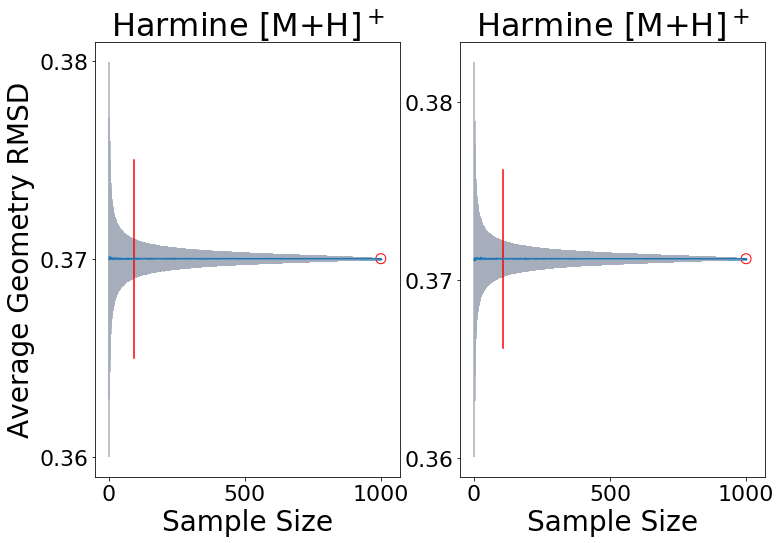

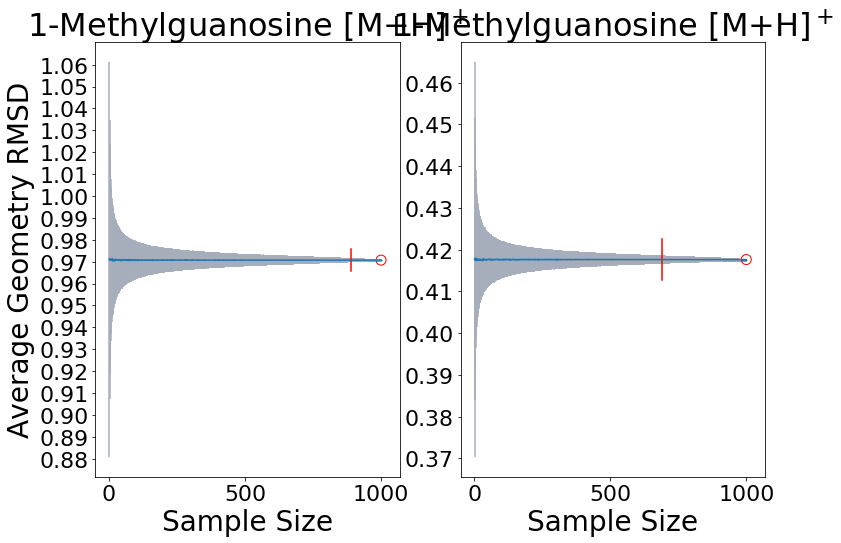

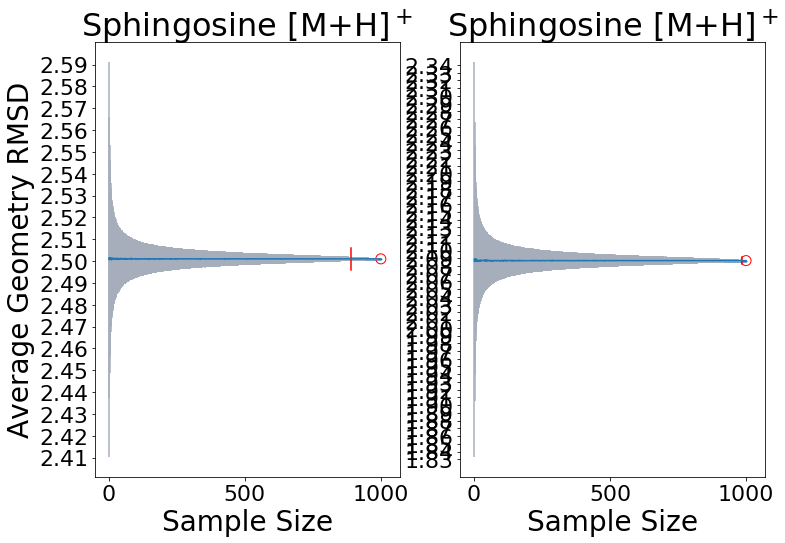

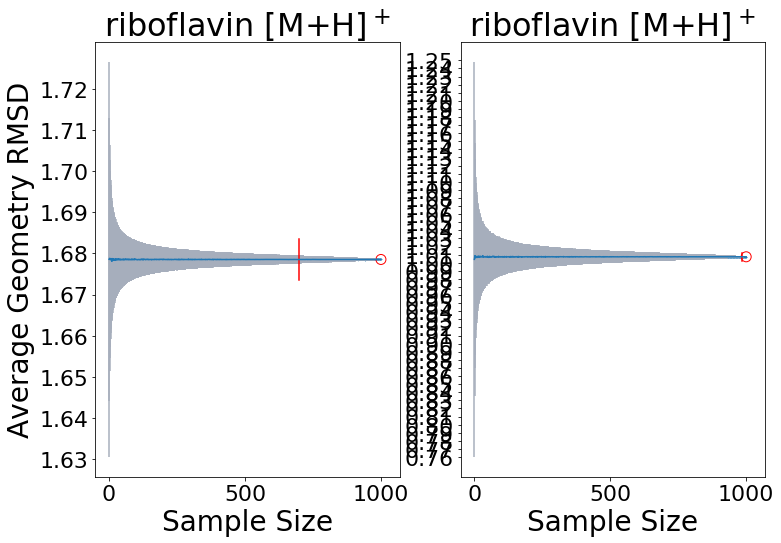

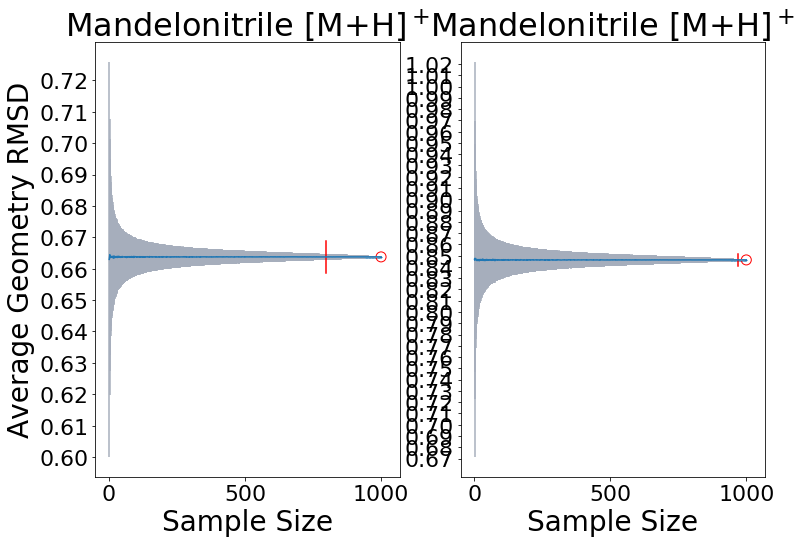

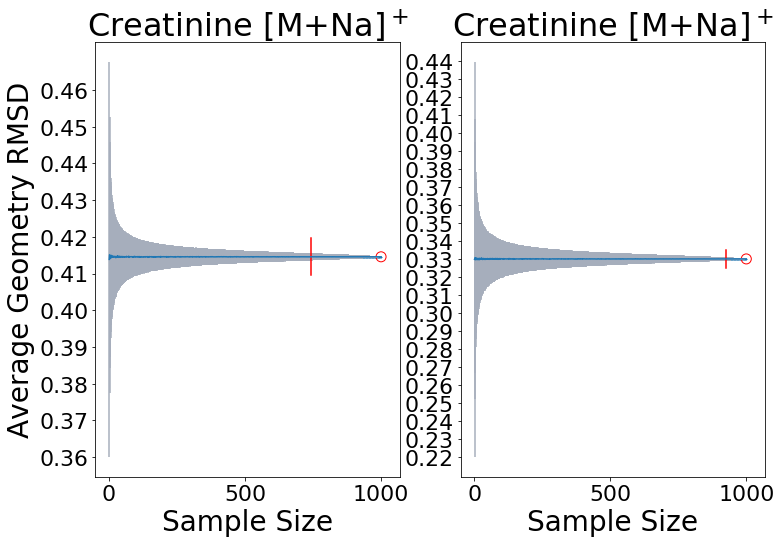

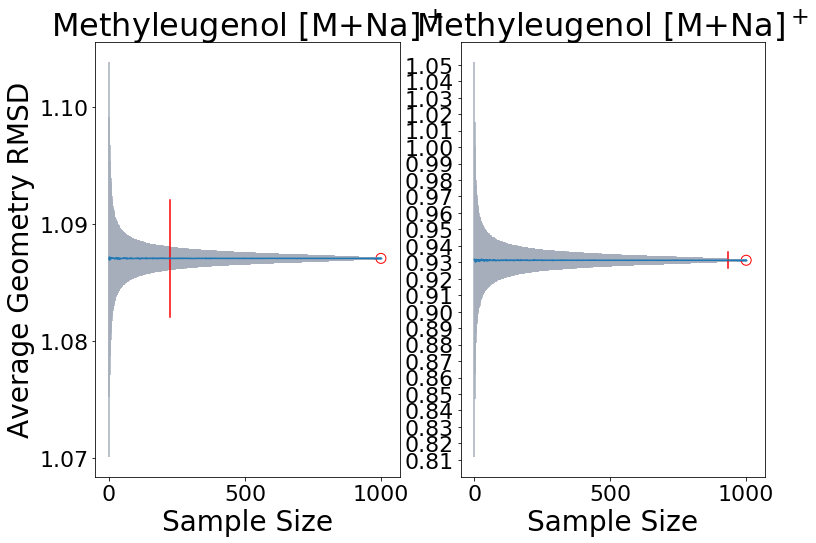

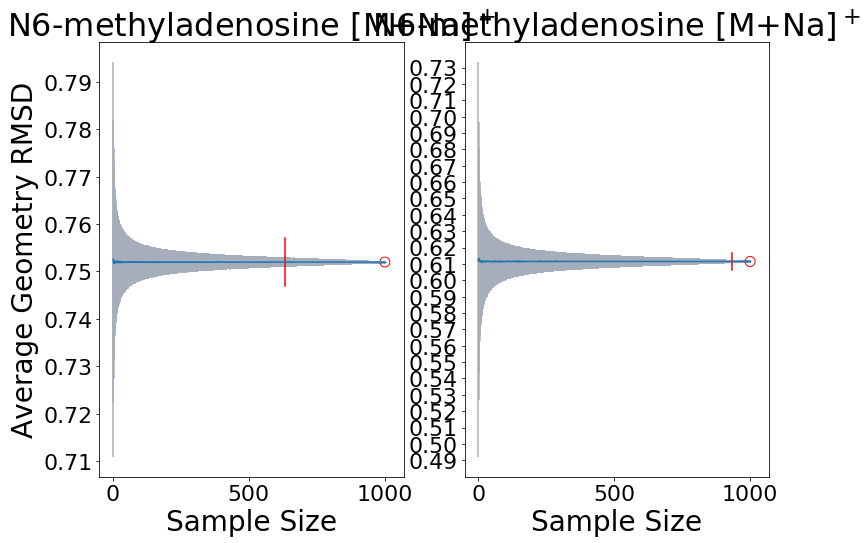

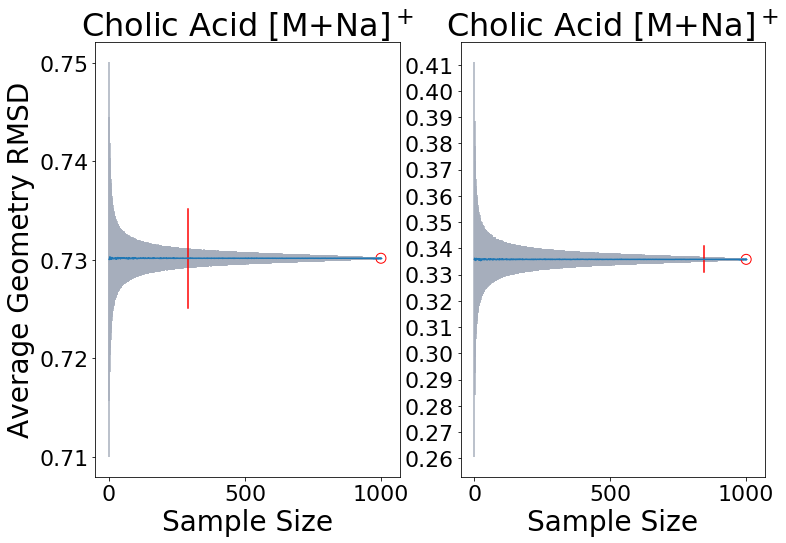

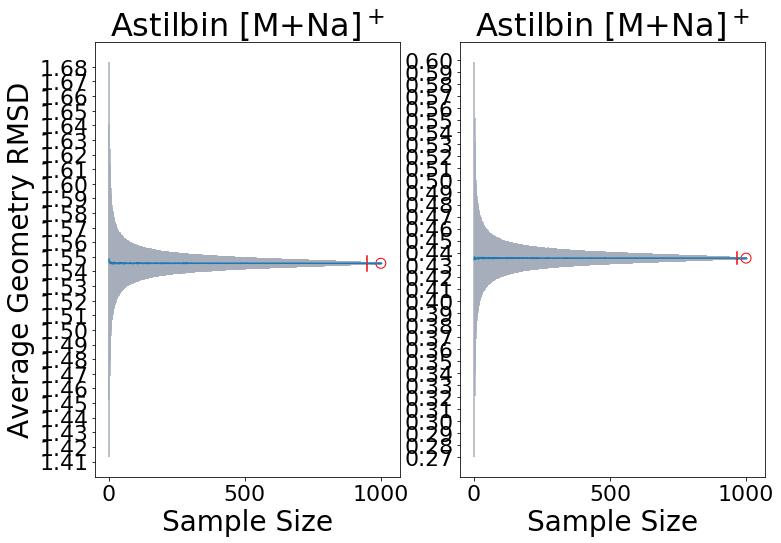

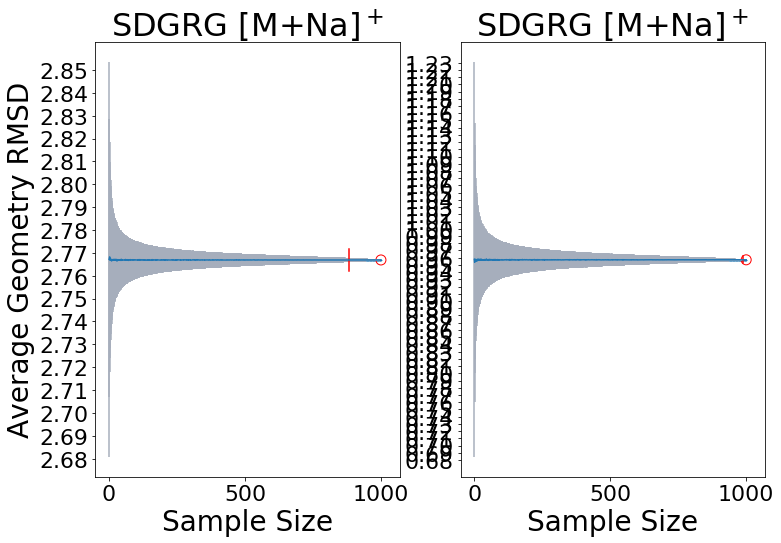

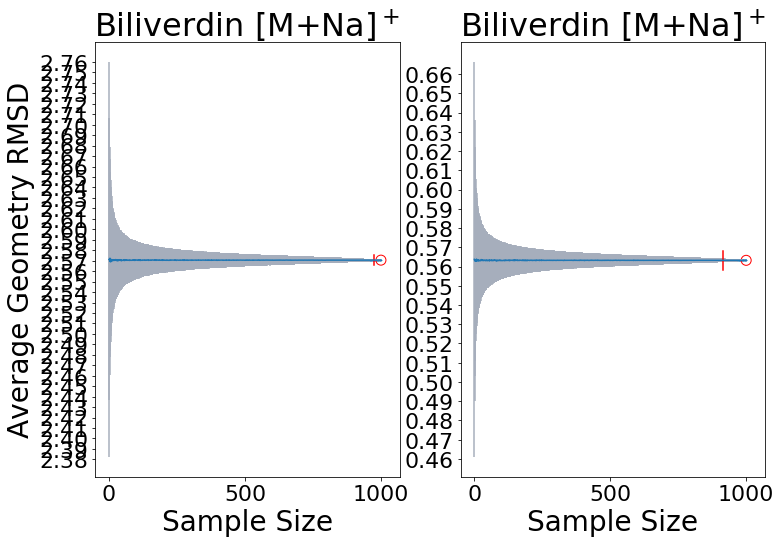

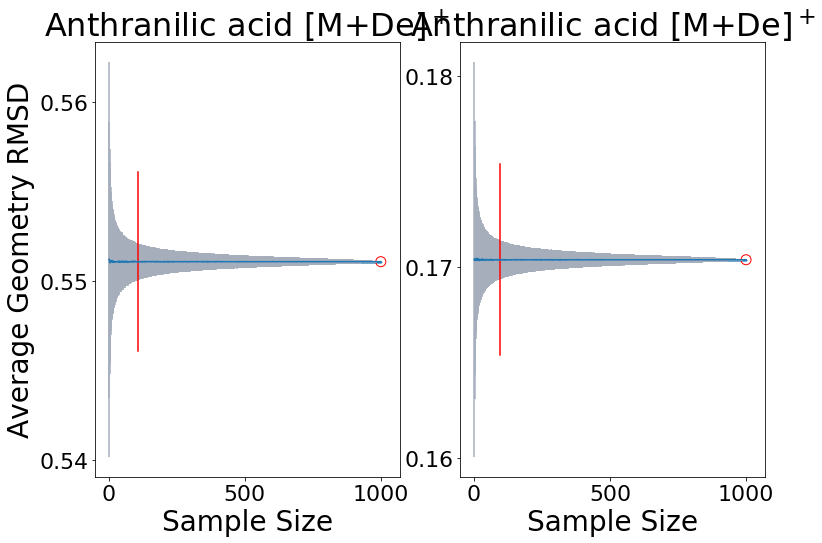

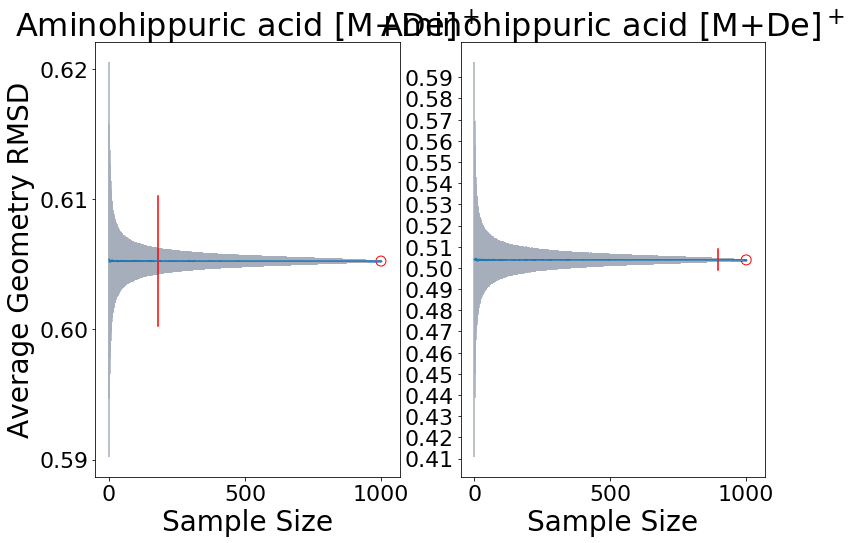

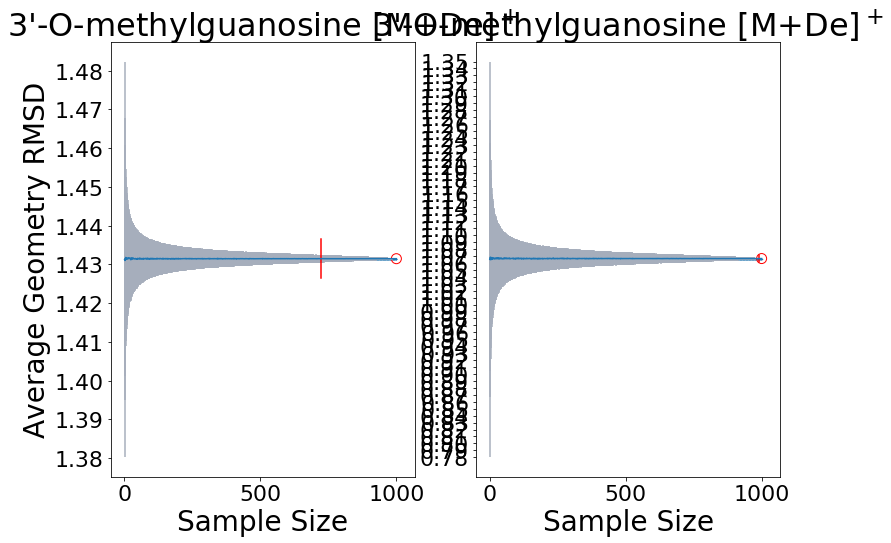

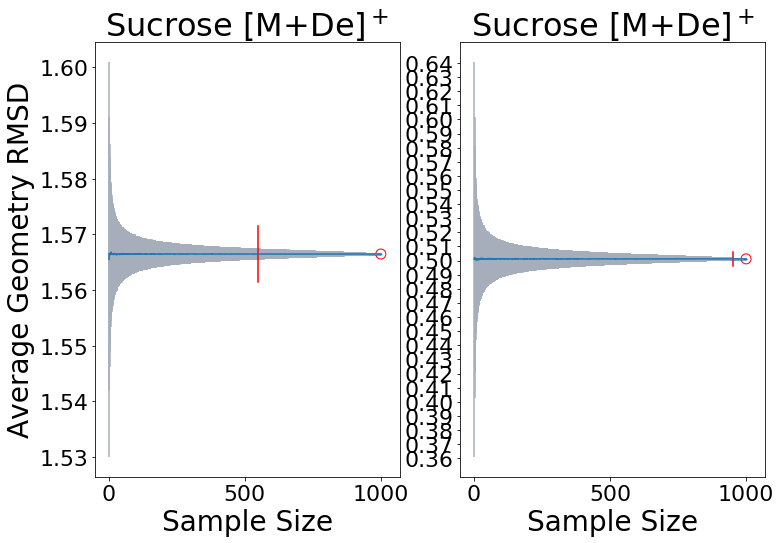

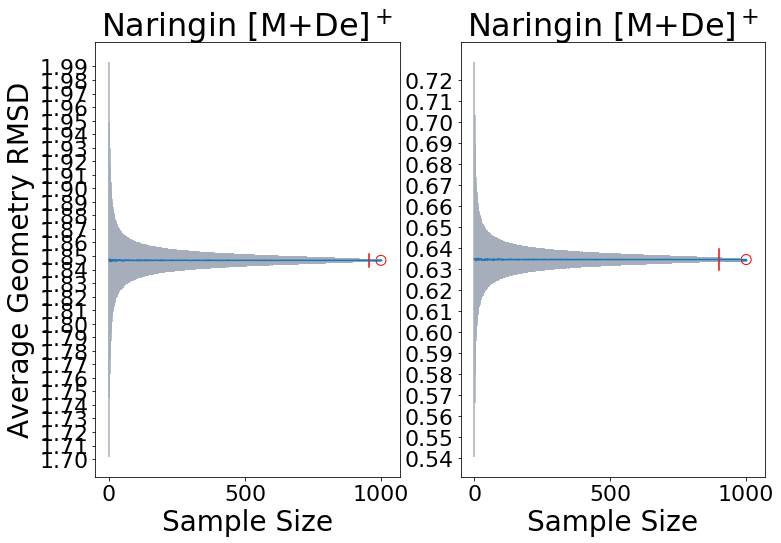

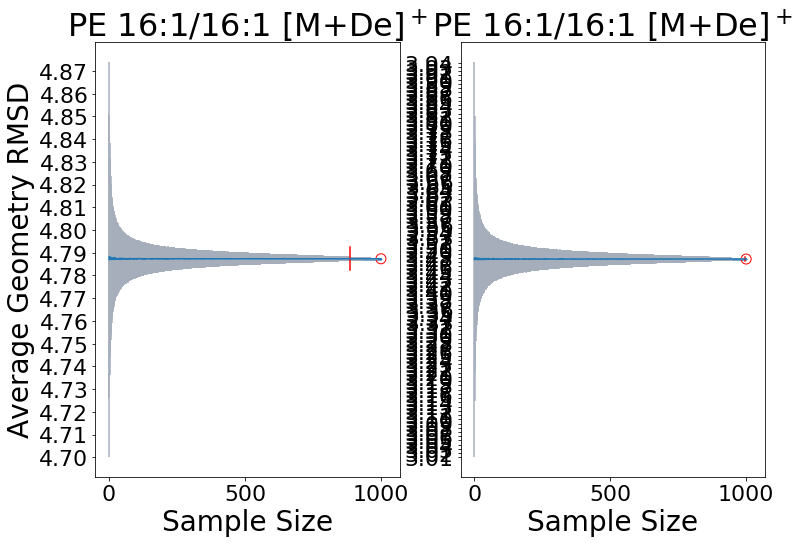

In [4]:
for d, ID in enumerate(molids):
    x = [i for i in range(1, 1001)]
    a = 12
    b = np.ceil(a*1.61803398875 - a)
    fig = plt.figure(figsize=(a,b))
    
    #####
    # Across
    ax1 = plt.subplot(1,2,1)
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%0.2f'))    
    plt.title(f'{names[d]} [M{adducts[d]}]$^{adducts[d][0]}$', fontsize=32)

    ave1, stdev1 = avestdev(f'molid{ID}{adducts[d]}', 'acrossc', '_50')
    ytic = np.arange(min(ave1)-max(stdev1), max(ave1)+max(stdev1), 0.01)
    ytic2 = np.linspace(min(ave1)-max(stdev1), max(ave1)+max(stdev1), 5)

    plt.scatter(x, ave1, s=0.3)
    plt.errorbar(x, ave1, yerr=stdev1, ecolor='#a6aebc')
    plt.xlabel('Sample Size', fontsize=28)
    plt.ylabel('Average Geometry RMSD', fontsize=28)
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.yticks(ytic)
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    # plot line at "convergence", when stdev is within 0.001 (0.1% ?) of the convergence value
    df = pd.read_csv('../data/SA-rmsd-geoms/mass-v-rmsdconverg/mass-v-converg-cutoff-0.001-acrossc-non_normalized.csv')
    xconv = df.loc[df['molid'] == f'molid{ID}{adducts[d]}']['RMSD converg sample size'].values[0]
    yconv = df.loc[df['molid'] == f'molid{ID}{adducts[d]}']['RMSD converg value'].values[0]
    plt.plot((xconv, xconv), (yconv-0.005, yconv+0.005), 'r-')

    # plot dot at final convergence
    plt.scatter(x[-1], ave1[-1], marker='o', s=100, facecolors='none', edgecolors='r')

    ## plot max stdev line in red
    #plt.plot((0,0), (ave1[0]-stdev1[0], ave1[0]+stdev1[0]), c='r')
    
    #####
    # Per or within cycle
    ax2 = plt.subplot(1,2,2)
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.2f')) 
    plt.title(f'{names[d]} [M{adducts[d]}]$^{adducts[d][0]}$', fontsize=32)

    ave1, stdev1 = avestdev(f'molid{ID}{adducts[d]}', 'perc', '_50')
    ytic = np.arange(min(ave1)-max(stdev1), max(ave1)+max(stdev1), 0.01)
    ytic2 = np.linspace(min(ave1)-max(stdev1), max(ave1)+max(stdev1), 5)

    plt.scatter(x, ave1, s=0.3)
    plt.errorbar(x, ave1, yerr=stdev1, ecolor='#a6aebc')
    plt.xlabel('Sample Size', fontsize=28)
    #plt.ylabel('Average Geometry RMSD', fontsize=28)
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.yticks(ytic)
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    # plot line at "convergence", when stdev is within 0.001 (0.1% ?) of the convergence value
    df = pd.read_csv('../data/SA-rmsd-geoms/mass-v-rmsdconverg/mass-v-converg-cutoff-0.001-perc-non_normalized.csv')
    xconv = df.loc[df['molid'] == f'molid{ID}{adducts[d]}']['RMSD converg sample size'].values[0]
    yconv = df.loc[df['molid'] == f'molid{ID}{adducts[d]}']['RMSD converg value'].values[0]
    plt.plot((xconv, xconv), (yconv-0.005, yconv+0.005), 'r-')

    # plot dot at final convergence
    plt.scatter(x[-1], ave1[-1], marker='o', s=100, facecolors='none', edgecolors='r')

    ## plot max stdev line in red
    #plt.plot((0,0), (ave1[0]-stdev1[0], ave1[0]+stdev1[0]), c='r')    
    
    
    plt.show()


### Example convergence plot of MC on RMSD for Harmine

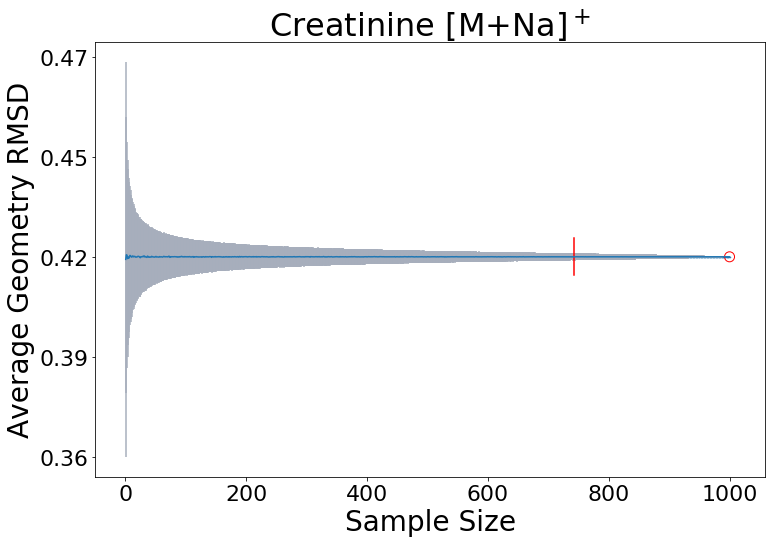

In [5]:
x = [i for i in range(1, 1001)]
a = 12
b = np.ceil(a*1.61803398875 - a)
fig = plt.figure(figsize=(a,b))
ax = fig.add_subplot(111)
plt.title(r'Creatinine [M+Na]$^+$', fontsize=32)

ave1, stdev1 = avestdev('molid11+Na', 'acrossc', '_50')
ytic = np.arange(min(ave1)-max(stdev1), max(ave1)+max(stdev1), 0.01)
ytic2 = np.linspace(min(ave1)-max(stdev1), max(ave1)+max(stdev1), 5)

plt.scatter(x, ave1, s=0.3)
plt.errorbar(x, ave1, yerr=stdev1, ecolor='#a6aebc')
plt.xlabel('Sample Size', fontsize=28)
plt.ylabel('Average Geometry RMSD', fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.yticks(ytic2)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# plot line at "convergence", when stdev is within 0.001 (0.1% ?) of the convergence value
df = pd.read_csv('../data/SA-rmsd-geoms/mass-v-rmsdconverg/mass-v-converg-cutoff-0.001-acrossc-non_normalized.csv')
xconv = df.loc[df['molid'] == 'molid11+Na']['RMSD converg sample size'].values[0]
yconv = df.loc[df['molid'] == 'molid11+Na']['RMSD converg value'].values[0]
plt.plot((xconv, xconv), (yconv-0.005, yconv+0.005), 'r-')

# plot dot at final convergence
plt.scatter(x[-1], ave1[-1], marker='o', s=100, facecolors='none', edgecolors='r')

#plt.savefig('creatinine_MC_rmsd.png', dpi=900)
plt.show()


### Across cycle and within cycles all-in-one plots next to each other

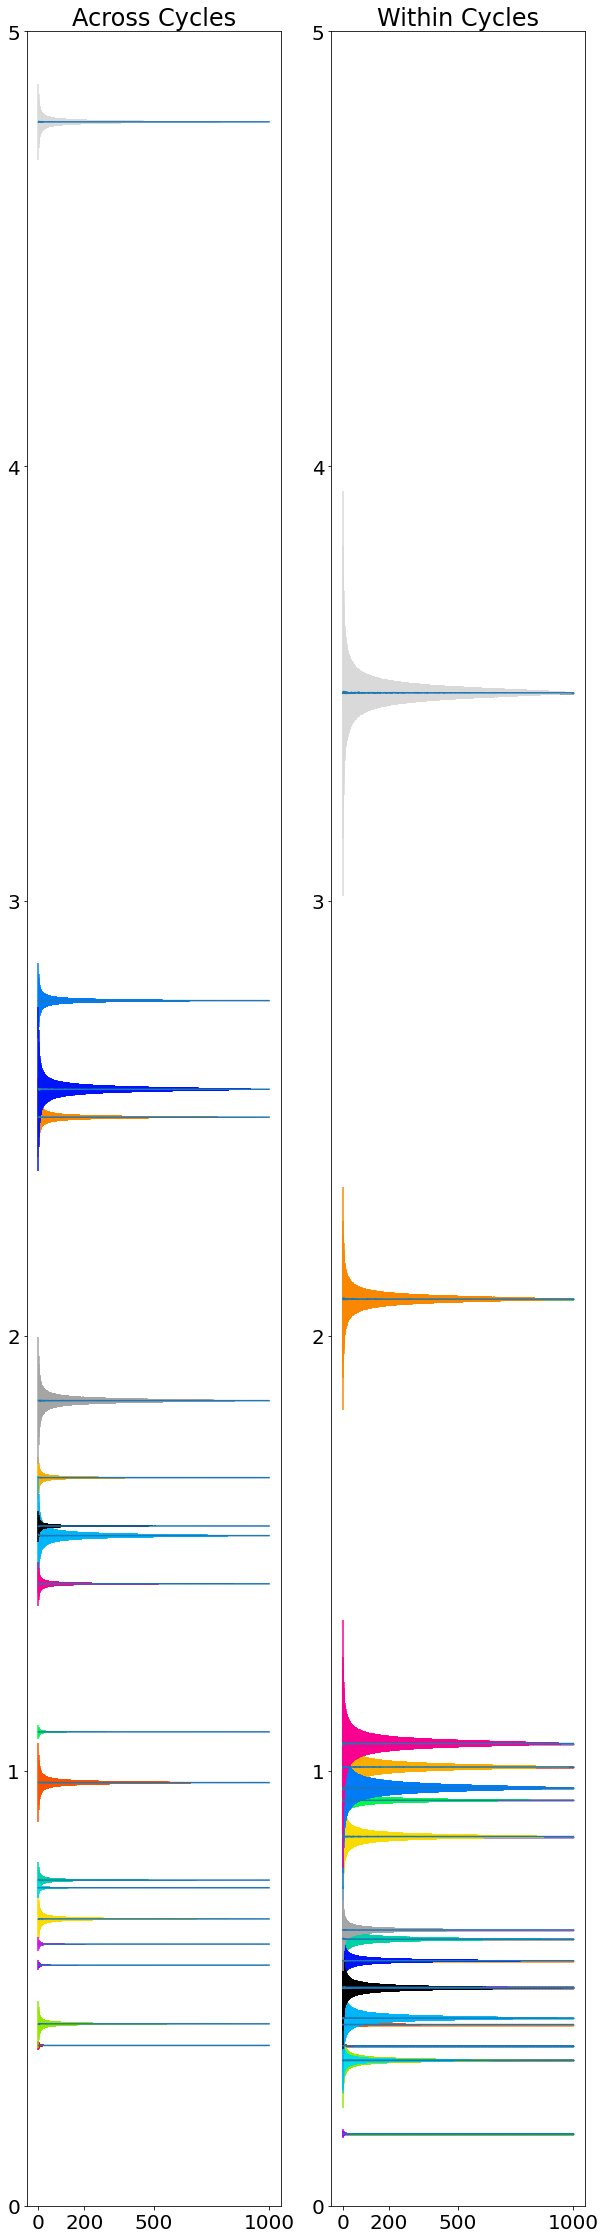

In [5]:
x = [i for i in range(1, 1001)]
plt.figure(figsize=(10,40))

plt.subplot(1,2,1)
plt.title('Across Cycles', fontsize=24)
plt.ylim(0,5)
plt.xticks([0,200,500, 1000])
plt.tick_params(axis='both', which='major', labelsize=20)

for i, mol in enumerate(molids):
    ave, stdev = avestdev(f'molid{mol}{adducts[i]}', 'acrossc', '_50')
    plt.errorbar(x, ave, yerr=stdev, ecolor=f'{hexs2[i]}')

ax = plt.subplot(1,2,2)
plt.title('Within Cycles', fontsize=24)
plt.ylim(0,5)

for i, mol in enumerate(molids):
    ave, stdev = avestdev(f'molid{mol}{adducts[i]}', 'perc', '_50')
    plt.scatter(x, ave, s=0.3)
    plt.errorbar(x, ave, yerr=stdev, ecolor=f'{hexs2[i]}')
    
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks([0,200,500, 1000])
plt.show()
#plt.savefig('across_and_within_cycles_MC_RMSD_comparison.png', dpi=600)